Link to the OneDrive : https://colab.research.google.com/drive/125BZV0eG7l3ZF6wg2acbRiXU1bvB8a_P?usp=sharing

**1. Importing Basic Libraries**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Reading the Dataset**

In [192]:
data = pd.read_csv("/content/Rainfall.csv")

**3. Basic checks on the data**

In [193]:
data.shape

(366, 12)

In [103]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [105]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [106]:
# Display count of unique values in each column
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in day: 31
Unique values in pressure : 188
Unique values in maxtemp: 174
Unique values in temparature: 158
Unique values in mintemp: 157
Unique values in dewpoint: 158
Unique values in humidity : 49
Unique values in cloud : 79
Unique values in rainfall: 2
Unique values in sunshine: 104
Unique values in          winddirection: 31
Unique values in windspeed: 223


In [107]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

**4. Correcting the space in winddirection column**

In [151]:
data.columns = data.columns.str.strip()

In [109]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

**5. Dropping irrelevent columns for prediction**

In [152]:
data.drop(columns=['day'], inplace = True)

In [112]:
data.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


**6. Checking Null Value**

In [113]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [115]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [116]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

**7. Handling Missing Values**

In [153]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [154]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [119]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [155]:
# Converting yes and no to 1 and 0 respectively
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


**8. Explore Data Analysis**

In [121]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

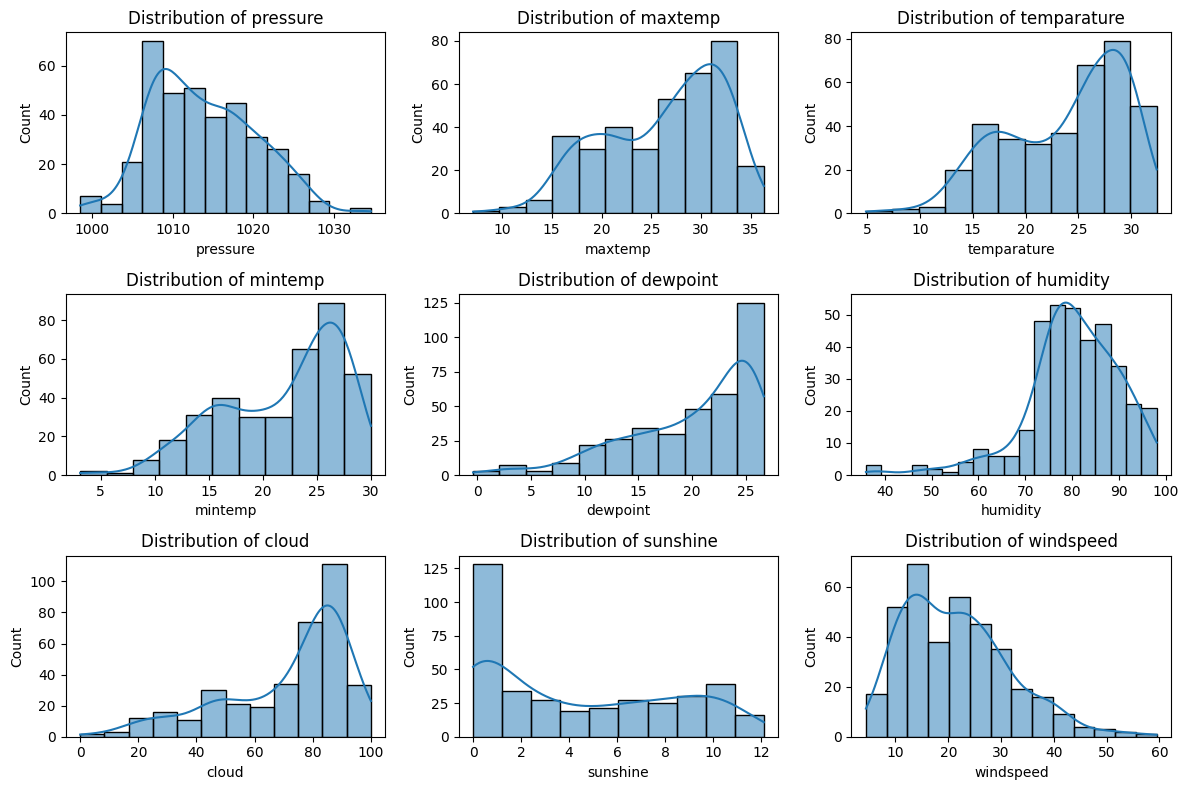

In [122]:
plt.figure(figsize=(12,8))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3,3,i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


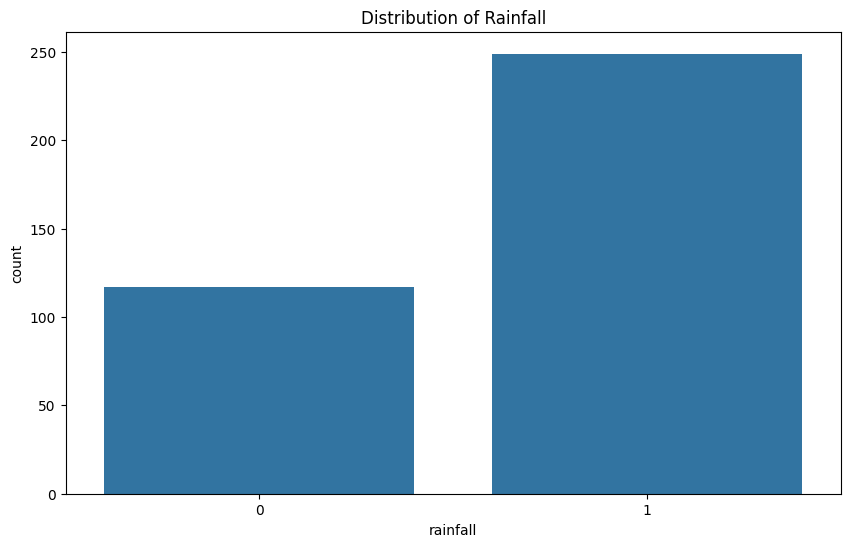

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(x='rainfall', data = data)
plt.title("Distribution of Rainfall")
plt.show()

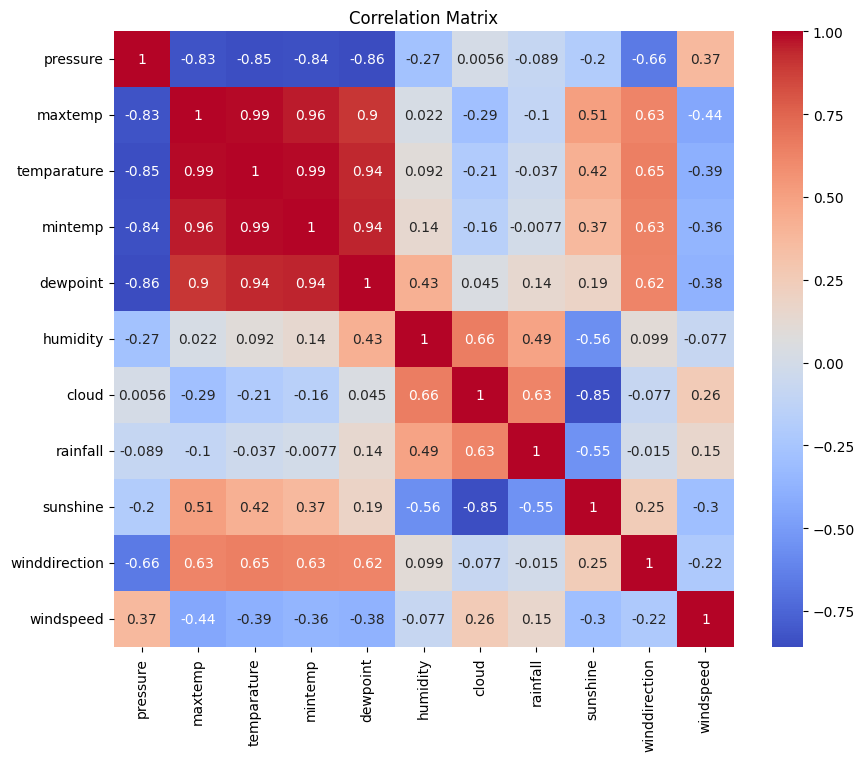

In [124]:
#Correlation matrix

corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

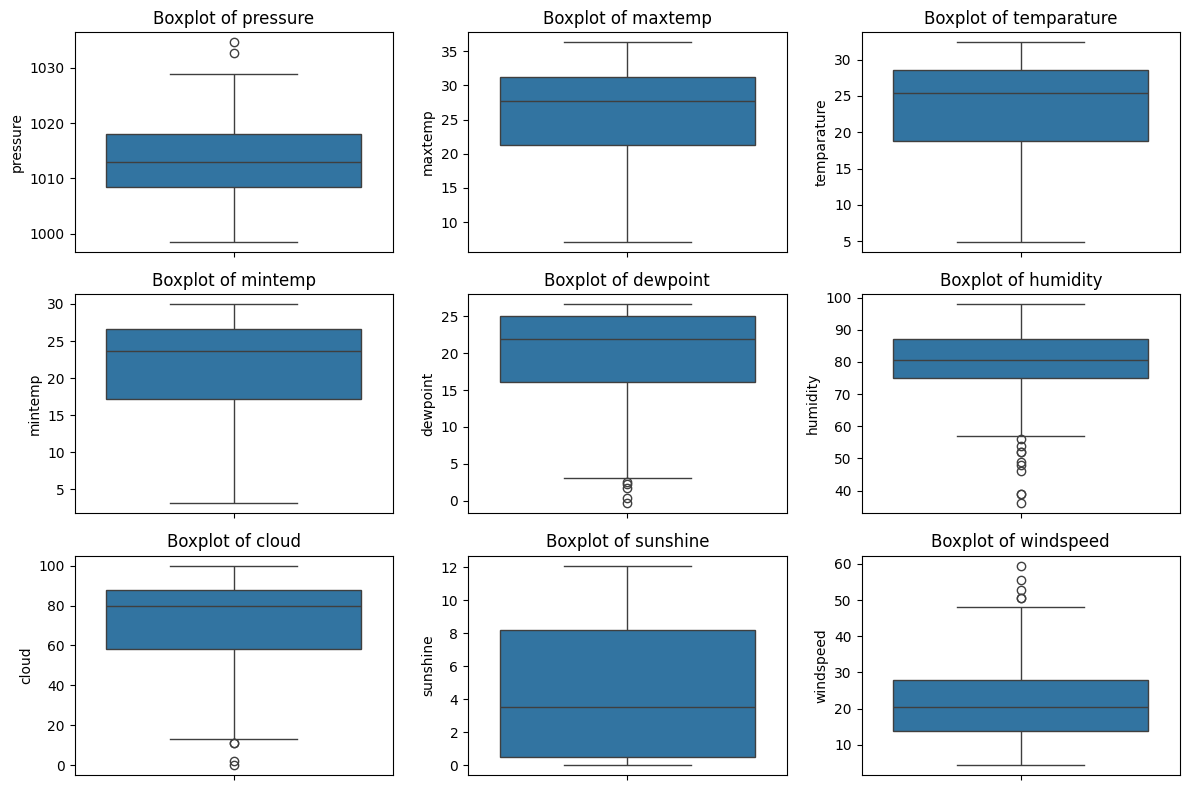

In [125]:
plt.figure(figsize=(12,8))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

**9. Data Preprocessing**

In [156]:
#Dropping highly correlated columns
data = data.drop(['maxtemp', 'mintemp', 'dewpoint'], axis = 1)
data.head()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,95,81,1,0.0,40.0,13.7


**10. Checking the Balance of Target variable and Handling imbalance**

In [157]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [158]:
rainfall_1 = data[data['rainfall'] == 1]
rainfall_0 = data[data['rainfall'] == 0]

In [159]:
# Downsampling the data for rainfall_1
from sklearn.utils import resample
rainfall_1_downsample = resample(rainfall_1, replace = False, n_samples = len(rainfall_0), random_state = 42)
rainfall_1_downsample

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,30.2,77,53,1,10.5,270.0,11.3
9,1017.5,18.0,85,91,1,0.0,70.0,37.7
137,1012.3,23.7,80,86,1,0.3,80.0,39.5
89,1018.3,20.0,79,89,1,2.4,40.0,14.8
157,1008.8,26.2,91,80,1,2.2,20.0,11.2
...,...,...,...,...,...,...,...,...
252,1012.0,28.2,74,44,1,10.1,70.0,26.2
349,1019.0,18.4,69,70,1,2.2,10.0,26.8
187,1008.4,27.3,93,88,1,0.5,130.0,24.8
0,1025.9,18.3,72,49,1,9.3,80.0,26.3


In [160]:
# merging rainfall column values 0 and 1
rainfall_downsample = pd.concat([rainfall_1_downsample, rainfall_0])
rainfall_downsample

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,30.2,77,53,1,10.5,270.0,11.3
9,1017.5,18.0,85,91,1,0.0,70.0,37.7
137,1012.3,23.7,80,86,1,0.3,80.0,39.5
89,1018.3,20.0,79,89,1,2.4,40.0,14.8
157,1008.8,26.2,91,80,1,2.2,20.0,11.2
...,...,...,...,...,...,...,...,...
351,1025.9,13.2,39,25,0,9.1,20.0,35.6
352,1026.4,13.9,48,11,0,9.5,40.0,25.2
353,1025.4,16.2,62,71,0,2.1,30.0,29.0
360,1020.6,17.9,74,87,0,0.6,30.0,21.6


In [161]:
# Shuffling the data
rainfall_downsample = rainfall_downsample.sample(frac = 1, random_state = 42).reset_index(drop = True)
rainfall_downsample.head()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,18.0,78,90,1,0.0,30.0,28.5
1,1013.4,26.2,69,17,0,10.5,70.0,12.4
2,1006.1,29.6,74,27,0,10.8,220.0,8.7
3,1007.6,27.6,85,84,1,1.8,70.0,34.8
4,1021.2,14.8,66,18,0,10.1,20.0,24.4


In [162]:
rainfall_downsample['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


**11. Data split into Training and Testing data**

In [163]:
# Splitting features as X and target variable as Y
X = rainfall_downsample.drop(columns = ['rainfall'])
y = rainfall_downsample['rainfall']
print(X)


     pressure  temparature  humidity  cloud  sunshine  winddirection  \
0      1022.2         18.0        78     90       0.0           30.0   
1      1013.4         26.2        69     17      10.5           70.0   
2      1006.1         29.6        74     27      10.8          220.0   
3      1007.6         27.6        85     84       1.8           70.0   
4      1021.2         14.8        66     18      10.1           20.0   
..        ...          ...       ...    ...       ...            ...   
229    1008.1         28.1        86     75       5.7           20.0   
230    1010.1         21.5        91     89       0.0           70.0   
231    1020.6         16.1        91     88       0.3           50.0   
232    1008.3         29.4        74     29       5.7           10.0   
233    1005.0         28.6        87     82       2.2          160.0   

     windspeed  
0         28.5  
1         12.4  
2          8.7  
3         34.8  
4         24.4  
..         ...  
229        9.5  

In [164]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

**12. Model Training using Random Forest Classifier**

In [166]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

params = {
    "n_estimators" : [50, 100, 200],
    "max_features" : ["sqrt", "log2"],
    "max_depth" : [None, 5, 10, 15],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}


In [167]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [168]:
best_rf = gridsearch.best_estimator_
print("Best Parameter for the RF model is :", gridsearch.best_params_)
best_rf

Best Parameter for the RF model is : {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=5)

**12.1. Model Validation on Test Data**

In [169]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross Validation Score : ", cv_scores)
print("Mean Cross Validation Score : ", cv_scores.mean())

Cross Validation Score :  [0.68421053 0.84210526 0.86486486 0.81081081 0.86486486]
Mean Cross Validation Score :  0.813371266002845


In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred1 = best_rf.predict(X_test)
print("Test set Accuracy : ", accuracy_score(y_test, y_pred1))
print("Test set Confusion Matrix : \n", confusion_matrix(y_test, y_pred1))
print("Recall Score : ", classification_report(y_test, y_pred1))



Test set Accuracy :  0.7872340425531915
Test set Confusion Matrix : 
 [[18  6]
 [ 4 19]]
Recall Score :                precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.76      0.83      0.79        23

    accuracy                           0.79        47
   macro avg       0.79      0.79      0.79        47
weighted avg       0.79      0.79      0.79        47



**13. Model Training using Gradient Boosting Classifier**

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb = GradientBoostingClassifier()

# Define the parameter grid
params = {
    "n_estimators" : [50, 100, 150, 200, 300],
    "learning_rate" : [0.01, 0.1, 0.2, 0.3],
    "max_depth" : [3, 5, 7, 9],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}


In [172]:
# Hyperparameter Tuning
gridsearch = GridSearchCV(estimator=gb, param_grid=params, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train, y_train)
best_gb = gridsearch.best_estimator_
print("Best Parameters for the Gradient Boosting model are:", gridsearch.best_params_)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters for the Gradient Boosting model are: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}


**13. Model Evaluation**

In [173]:
cv_scores = cross_val_score(best_gb, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.71052632 0.81578947 0.75675676 0.81081081 0.81081081]
Mean Cross-Validation Score: 0.7809388335704126


In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred2 = best_gb.predict(X_test)

# Print evaluation metrics
print("Test Set Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))


Test Set Accuracy: 0.7446808510638298
Confusion Matrix:
 [[18  6]
 [ 6 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.74      0.74      0.74        23

    accuracy                           0.74        47
   macro avg       0.74      0.74      0.74        47
weighted avg       0.74      0.74      0.74        47



**14. Prediction of Y using best fit model**

In [176]:
X_train.columns

Index(['pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [177]:
input_data = [1022, 18.9, 81, 83, 0.5, 50, 15.3]
input_data_df = pd.DataFrame([input_data], columns = ['pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])
input_data_df

,pressure,temparature,humidity,cloud,sunshine,winddirection,windspeed
0,1022,18.9,81,83,0.5,50,15.3


In [178]:
prediction = best_rf.predict(input_data_df)
prediction

array([1])

In [179]:
print("Prediction Result is : ", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result is :  Rainfall


**15. Saving the Model to a pickle file**

In [181]:
import pickle
model_data = {"model" : best_rf, "features" : X_train.columns.tolist()}

with open("Rainfall_Prediction_Model.pkl", "wb") as file:
  pickle.dump(model_data, file)

**16. Load the pickle file and use it for prediction**

In [182]:
import pickle
import pandas as pd

In [187]:
# Load the trained model and features from the pickle file
with open("Rainfall_Prediction_Model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [188]:
model = model_data["model"]
features = model_data["features"]

In [190]:
input_data =  [1022, 18.9, 81, 83, 0.5, 50, 15.3]
input_data_df = pd.DataFrame([input_data], columns = features)
print(input_data_df)
prediction = best_rf.predict(input_data_df)
print("Prediction Result is : ", "Rainfall" if prediction[0]==1 else "No Rainfall")

   pressure  temparature  humidity  cloud  sunshine  winddirection  windspeed
0      1022         18.9        81     83       0.5             50       15.3
Prediction Result is :  Rainfall
